In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization,Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# from google.colab import files
import zipfile
import tensorflow as tf
import os


%matplotlib inline
import pandas as pd

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# predicting the images
from PIL import Image
import requests
import cv2
from io import BytesIO

In [3]:
classifier = tf.keras.models.load_model('../model/sleep_model_81.h5')

In [15]:
#Prediction of image
# {'rem': 0, 'sleep': 1, 'wake': 2}

def predict_image(img_type):
    img1 = image.load_img(img_type, target_size=(64, 64))
    img = image.img_to_array(img1)
    img_norm = img/255
    img_4d = np.expand_dims(img_norm, axis=0)
    prediction = classifier.predict_classes(img_4d, batch_size=None)
#     print(prediction)
    if prediction[0] == 1:
        print("It is Sleep Picture of Rat mind")
    elif prediction[0] == 0:
        print("It is Rem Picture of Rat mind")
    elif prediction[0] == 2:
        print("It is Wake Picture of Rat mind")
    plt.imshow(img1)

In [16]:
rem_image = "../data/validation/rem/img_11_R.JPG"
wake_image = "../data/validation/wake/img_10_W.JPG"
sleep_image = "../data/validation/sleep/img_10_S.JPG"

It is Sleep Picture of Rat mind


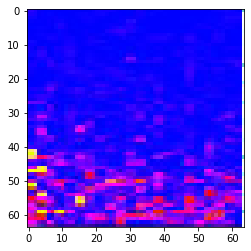

In [17]:
predict_image(sleep_image)

It is Wake Picture of Rat mind


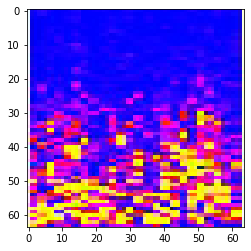

In [18]:
predict_image(wake_image)

It is Wake Picture of Rat mind


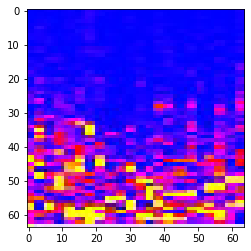

In [20]:
predict_image(rem_image) # missclassify

In [88]:
batch_size = 32
epochs = 100
IMG_HEIGHT = 64
IMG_WIDTH = 64

valid_generator = ImageDataGenerator(rescale=1./255)

test_set = valid_generator.flow_from_directory(directory="../data/validation",
                                                      target_size = (IMG_WIDTH,IMG_HEIGHT),
                                                      batch_size=batch_size,
                                                      shuffle =True,
                                                      class_mode = 'sparse',
                                                      seed = 42)

Found 135 images belonging to 3 classes.


In [89]:
ytesthat = classifier.predict_classes(test_set, batch_size=None)

In [90]:
df = pd.DataFrame({
    'Filname':test_set.filenames,
    'Actual':test_set.classes,
    'Prediction':ytesthat[:]
})

In [91]:
df.tail(10)

,Filname,Actual,Prediction
125,wake\img_14_W.JPG,2,2
126,wake\img_150_W.JPG,2,2
127,wake\img_151_W.JPG,2,2
128,wake\img_152_W.JPG,2,2
129,wake\img_153_W.JPG,2,2
130,wake\img_154_W.JPG,2,2
131,wake\img_155_W.JPG,2,2
132,wake\img_156_W.JPG,2,2
133,wake\img_157_W.JPG,2,2
134,wake\img_158_W.JPG,2,2


In [92]:
missclassify = df[df.Actual != df.Prediction]

In [95]:
print(f"Total misclassified image from 135 Validation images are : {missclassify['Actual'].count()}")

Total misclassified image from 135 Validation images are : 72


In [96]:
conf_matrix = confusion_matrix(df.Actual,df.Prediction)

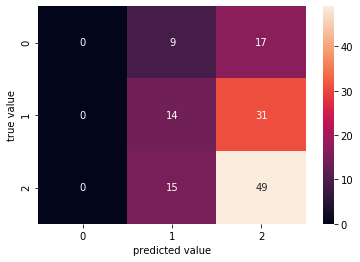

In [99]:
sns.heatmap(conf_matrix,annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

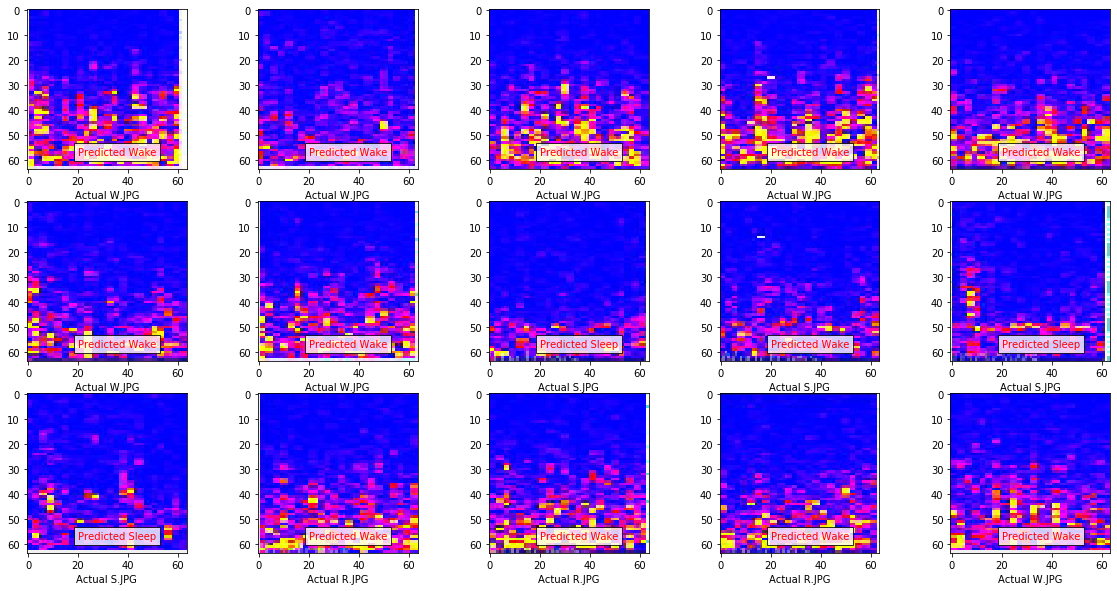

In [148]:
#  for generator image set u can use 
# ypred = classifier.predict_generator(test_set)
# {'rem': 0, 'sleep': 1, 'wake': 2}

fig=plt.figure(figsize=(20, 10))
columns = 5
rows = 3
count = 134
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    path = "../data/validation/"+test_set.filenames[count].replace('\\','/')
    img1 = image.load_img(path, target_size=(64, 64))
    
#     img1 = image.load_img('test1/'+test_set1.filenames[np.random.choice(range(12500))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict_classes(img, batch_size=None) #gives all class prob.
    if prediction[:] == 0:
        value = 'Predicted Rem'
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        plt.xlabel(f"Actual {test_set.filenames[count][-5:]}")
    elif prediction[:] == 1:
        value = 'Predicted Sleep'
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        plt.xlabel(f"Actual {test_set.filenames[count][-5:]}")
    else:
        value = 'Predicted Wake'
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        plt.xlabel(f"Actual {test_set.filenames[count][-5:]}")
    count = count - 10
    plt.imshow(img1)


# Thank You 
if you have question or query 
please email me at khizarsultan007@gmail.com without any hesitation